# Testing Neural Networks for a Digit Classifier

At the moment, image classification is a large field in machine learning that garners much attention. Appearing in a wide range of fields from survalence technology to medical applications.  The handwritten digit classifier allows the the workflow to be established, but machine learning is memory intensive so keeping the pixel count low allows for higher proccessing speed on a lower powered computer. 

In this project we will implament multiple iterations of a neural network. We will test variables such as depth, number of nodes, and how the nodes are selected. 

### Importing and Visualizing the Data 

Our first order is to verify the dataset by graphing it in a manner that is familiar to the viewer. 

In [1]:
import sklearn.datasets
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.neural_network import MLPClassifier
import numpy as np

%matplotlib inline


digits=sklearn.datasets.load_digits()
digits.keys()



dict_keys(['images', 'target_names', 'target', 'DESCR', 'data'])

In [2]:
labels=pd.Series(digits['target'])

In [3]:
df=pd.DataFrame(digits['data'])
df.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


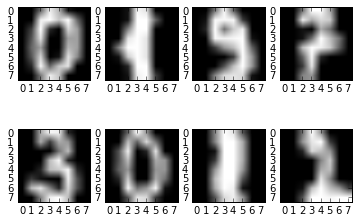

In [4]:
fig, ax = plt.subplots(2,4)
ax[0,0].imshow(df.iloc[0].values.reshape(8,8), cmap='Greys_r')
ax[0,1].imshow(df.iloc[99].values.reshape(8,8), cmap='Greys_r')
ax[0,2].imshow(df.iloc[199].values.reshape(8,8), cmap='Greys_r')
ax[0,3].imshow(df.iloc[299].values.reshape(8,8), cmap='Greys_r')

ax[1,0].imshow(df.iloc[999].values.reshape(8,8), cmap='Greys_r')
ax[1,1].imshow(df.iloc[1099].values.reshape(8,8), cmap='Greys_r')
ax[1,2].imshow(df.iloc[1199].values.reshape(8,8), cmap='Greys_r')
ax[1,3].imshow(df.iloc[1299].values.reshape(8,8), cmap='Greys_r')

plt.show()

### K-Neighbors Classifier

First we initialize a K-Neighbors Classifier which uses adjacent values of the training set and groups according to similar values.

In [5]:
def f_train(n, train_data, train_labels):
    kn=KNeighborsClassifier(n_neighbors=n)
    kn.fit(train_data, train_labels)
    return kn
    
def f_test(model, test_data, test_labels):
    predictions=model.predict(test_data)
    correct=test_labels==predictions
    accuracy=correct.sum()/len(test_labels)
    return accuracy

def cross_val(n):
    overall=[]
    kf=KFold(n_splits=4, random_state=2)
    for train_index, test_index in kf.split(df):
        train_data, test_data=df.loc[train_index], df.loc[test_index]
        train_labels, test_labels=labels.loc[train_index], labels.loc[test_index]
        model=f_train(n, train_data, train_labels)
        accuracy=f_test(model, test_data, test_labels)
        overall.append(accuracy)
    avg_overall=np.mean(overall)
    return avg_overall

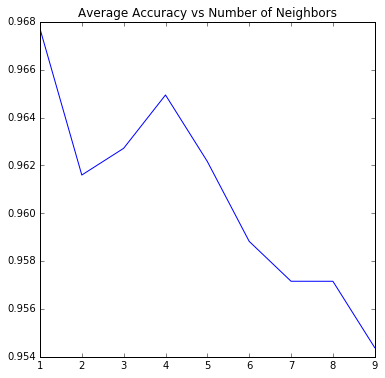

In [6]:
values=list(range(1,10))
accuracies=[]

for i in range(1,10):
    accuracy=cross_val(i)
    accuracies.append(accuracy)
    
plt.figure(figsize=(6,6))
plt.plot(values, accuracies)
plt.title("Average Accuracy vs Number of Neighbors")

We can see that as the number of neighbors increases, the accuracy of the model decreases overall. Though there are peaks and valleys, the highpoint is when we use  1 or 4 neighbors weighing in. The primary downside of the K-Neighors system is that it is non-transferable, and a new model must be trained each time it is used.

### Single Layer Neuro-Network

We now look to see a single layer Neruo-Network which works unsupervised, but only alters the number of neurons in the single layer. 

In [7]:
def train_MLP(number, train_data, train_labels):
    mlp=MLPClassifier(hidden_layer_sizes=number)
    mlp.fit(train_data, train_labels)
    model=mlp
    return model

def test_MLP(model, test_data, test_labels):
    predictions=model.predict(test_data)
    bool_frame=predictions==test_labels
    accuracy=sum(bool_frame)/len(bool_frame)
    return accuracy 

def cross_MLP(number):
    accuracies=[]
    kf=KFold(n_splits=4, random_state=0)
    for train_index, test_index in kf.split(df):
        train_data, test_data=df.loc[train_index], df.loc[test_index]
        train_labels, test_labels=labels.loc[train_index], labels.loc[test_index]
        model=train_MLP(number, train_data, train_labels)
        accuracy=test_MLP(model, test_data, test_labels)
        accuracies.append(accuracy)
    avg_acc=sum(accuracies)/4
    return avg_acc


/dataquest/system/env/python3/lib/python3.4/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.



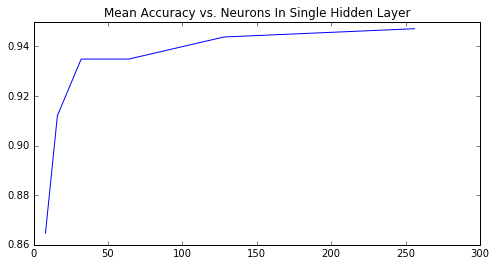

In [8]:
neurons = [
    (8,),
    (16,),
    (32,),
    (64,),
    (128,),
    (256,)
]
accuracies = []

for n in neurons:
    accuracy = cross_MLP(n)
   
    accuracies.append(accuracy)

plt.figure(figsize=(8,4))
plt.title("Mean Accuracy vs. Neurons In Single Hidden Layer")

x = [i[0] for i in neurons]
plt.plot(x, accuracies)


As we can see from the graph, we acheive a accuracy of about 94 percent as we increase the number of neurons. Since we acheived higher accuracy using the K-Neighbors method (which is computationally less demanding) we can eliminate the single layer. We can begin to see the effects of overfitting as the accuacy dips as the neurons increase.

### Multilayer Neuro-Network

We will look at two and three layer networks. These are computationally expensive, so a clear incease in accuracy is needed in order justify the increased load. 

In [9]:
def train_two_MLP(number, train_data, train_labels):
    mlp=MLPClassifier(hidden_layer_sizes=number)
    mlp.fit(train_data, train_labels)
    model=mlp
    return model

def test_two_MLP(model, test_data, test_labels):
    predictions=model.predict(test_data)
    bool_frame=predictions==test_labels
    accuracy=sum(bool_frame)/len(bool_frame)
    return accuracy 

def cross_two_MLP(number):
    accuracies=[]
    kf=KFold(n_splits=4, random_state=0)
    for train_index, test_index in kf.split(df):
        train_data, test_data=df.loc[train_index], df.loc[test_index]
        train_labels, test_labels=labels.loc[train_index], labels.loc[test_index]
        model=train_two_MLP(number, train_data, train_labels)
        accuracy=test_two_MLP(model, test_data, test_labels)
        accuracies.append(accuracy)
    avg_acc=sum(accuracies)/len(accuracies)
    return avg_acc

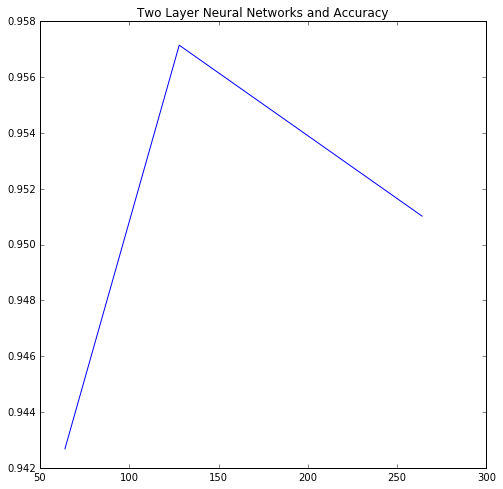

In [10]:
duals=[(64,64), (128, 128), (264, 264)]
x=[i[0] for i in duals]

outcomes=[]
for item in duals:
    output=cross_two_MLP(item)
    outcomes.append(output)
    
plt.figure(figsize=(8,8))
plt.title("Two Layer Neural Networks and Accuracy")           
plt.plot(x, outcomes)

We saw an improvement to 95% which puts this almost on par with K-Neighbors but with the benefit of being transferable. It is more computationally expensive though. We start to see some overfitting as the accuracy decreases. 

In [11]:
def cross_6_MLP(number):
    accuracies=[]
    kf=KFold(n_splits=6, random_state=0)
    for train_index, test_index in kf.split(df):
        train_data, test_data=df.loc[train_index], df.loc[test_index]
        train_labels, test_labels=labels.loc[train_index], labels.loc[test_index]
        model=train_two_MLP(number, train_data, train_labels)
        accuracy=test_two_MLP(model, test_data, test_labels)
        accuracies.append(accuracy)
    avg_acc=sum(accuracies)/len(accuracies)
    return avg_acc

/dataquest/system/env/python3/lib/python3.4/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.



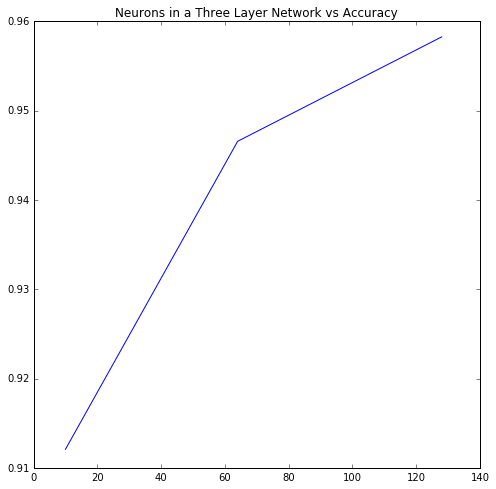

In [ ]:
trips=[(10,10,10), (64, 64, 64), (128, 128, 128)]
x=[i[0] for i in trips]

trips_out=[]
for item in trips:
    outcome=cross_6_MLP(item)
    trips_out.append(outcome)
    
plt.figure(figsize=(8,8))
plt.title("Neurons in a Three Layer Network vs Accuracy")
plt.plot(x, trips_out)

We can see a peak accuracy of roughly 96%. This is quite high for machine learning and we should consider overfitting, however with a six fold cross validation, we can feel comfortable that this is an accurate model. The increase in accuracy should be weighed along with the transferable nature of the model against the expensive computations.

### Conclusion

We tested several diffenet machine learning models, both supervised and unsupervised. With all the models tested a maximum accuracy of 95.8% was acheived using a three layer network with 128 neurons in each layer. This is an expensive but only one time train model; this is the model that is most optimal. 